<a href="https://colab.research.google.com/github/LinaAlRifai/PV/blob/main/PVClass2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
import re
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

**Merge AntiTNFDrugs1&AntiTNFDrugs2**

In [3]:
File1 = "AntiTNFDrugs1.xlsx"
File2 = "AntiTNFDrugs2.xlsx"
output_file = "BiosimilarAntiTNF.xlsx"
df1 = pd.read_excel(File1)
df2 = pd.read_excel(File2)
merged_df = pd.concat([df1, df2,], ignore_index=True)
merged_df.to_excel(output_file, index=False)
print(f"Files merged successfully into {output_file}")

Files merged successfully into BiosimilarAntiTNF.xlsx


**Read Data**

In [4]:
Biosimilar=pd.read_excel("BiosimilarAntiTNF.xlsx")
print(Biosimilar.head())
print(Biosimilar.shape)
print(Biosimilar.info())
print(Biosimilar.columns)

    Case ID                              Suspect Product Names  \
0  24380699  Stelara;Erelzi;Simponi;Sulfamethoxazole And Tr...   
1  24380614  Humira;Xeljanz;Erelzi;Butrans;Fosamax;Cimzia;M...   
2  24380182  Simponi;Cetirizine;Erelzi;Remicade;Orencia;Cim...   
3  24379633                                          Renflexis   
4  24379577                                          Renflexis   

                  Suspect Product Active Ingredients  \
0  Adalimumab;Mycophenolate Mofetil;Alendronate S...   
1  Secukinumab;Certolizumab Pegol;Leflunomide;Chl...   
2  Tocilizumab;Leflunomide;Alendronate Sodium;Pht...   
3                                    Infliximab-Abda   
4                                    Infliximab-Abda   

                                      Reason for Use  \
0  Arthritis;Product Used For Unknown Indication;...   
1  Migraine;Product Used For Unknown Indication;R...   
2  Product Used For Unknown Indication;Rheumatoid...   
3                                 Colitis 

In [5]:
Biosimilar = Biosimilar.drop(['Case ID', 'Event Date', 'Latest FDA Received Date','Patient Weight','Sender','Reporter Type', 'Report Source', 'Latest Manufacturer Received Date', 'Initial FDA Received Date',
      'Country where Event occurred','Reported to Manufacturer?','Manufacturer Control Number', 'Literature Reference','Concomitant Product Names','Compounded Flag'],axis=1)
print(Biosimilar.head())
print(Biosimilar.shape)
print(Biosimilar.columns)

                               Suspect Product Names  \
0  Stelara;Erelzi;Simponi;Sulfamethoxazole And Tr...   
1  Humira;Xeljanz;Erelzi;Butrans;Fosamax;Cimzia;M...   
2  Simponi;Cetirizine;Erelzi;Remicade;Orencia;Cim...   
3                                          Renflexis   
4                                          Renflexis   

                  Suspect Product Active Ingredients  \
0  Adalimumab;Mycophenolate Mofetil;Alendronate S...   
1  Secukinumab;Certolizumab Pegol;Leflunomide;Chl...   
2  Tocilizumab;Leflunomide;Alendronate Sodium;Pht...   
3                                    Infliximab-Abda   
4                                    Infliximab-Abda   

                                      Reason for Use  \
0  Arthritis;Product Used For Unknown Indication;...   
1  Migraine;Product Used For Unknown Indication;R...   
2  Product Used For Unknown Indication;Rheumatoid...   
3                                 Colitis Ulcerative   
4  Colitis Ulcerative;Product Used For Unknown

In [ ]:
Biosimilar.isnull().sum()

Suspect Product Names                 0
Suspect Product Active Ingredients    0
Reason for Use                        0
Reactions                             0
Serious                               0
Outcomes                              0
Sex                                   0
Case Priority                         0
Patient Age                           0
dtype: int64

In [ ]:
Biosimilar.columns

Index(['Suspect Product Names', 'Suspect Product Active Ingredients',
       'Reason for Use', 'Reactions', 'Serious', 'Outcomes', 'Sex',
       'Case Priority', 'Patient Age'],
      dtype='object')

In [ ]:
print(Biosimilar["Suspect Product Names"].unique())
print('-------------------------------------')
print(Biosimilar["Suspect Product Active Ingredients"].unique())
print('-------------------------------------')
print(Biosimilar["Reason for Use"].unique())
print('-------------------------------------')
print(Biosimilar["Reactions"].unique())
print('-------------------------------------')
print(Biosimilar["Serious"].unique())
print('-------------------------------------')
print(Biosimilar["Outcomes"].unique())
print('-------------------------------------')
print(Biosimilar["Sex"].unique())
print('-------------------------------------')
print(Biosimilar["Case Priority"].unique())
print('-------------------------------------')
print(Biosimilar["Patient Age"].unique())
print('-------------------------------------')
#print(Biosimilar["Concomitant Product Names"].unique())


['Stelara;Erelzi;Simponi;Sulfamethoxazole And Trimethoprim;Cimzia;Actemra;Emend;Remicade;Xeljanz;Orencia;Arava;Topicort;Enbrel;Cosentyx;Vitamin C;Cetirizine;Celebrex;Lyrica;Otezla;Chloraprep;Humira'
 'Humira;Xeljanz;Erelzi;Butrans;Fosamax;Cimzia;Minocycline;Remicade;Orencia;Berinert;Enbrel;Vitamin C;Simponi;Myochrysine;Atomoxetine;Stelara;Actemra;Lamictal;Myrbetriq;Aimovig;Nucala;Arava;Cosentyx'
 'Simponi;Cetirizine;Erelzi;Remicade;Orencia;Cimzia;Actemra' ...
 'Xeljanz;Amjevita' 'Purinethol;Hulio;Humira' 'Purinethol;Hulio']
-------------------------------------
['Adalimumab;Mycophenolate Mofetil;Alendronate Sodium;Cortisone Acetate;Chlorhexidine Gluconate\\Isopropyl Alcohol;Rituximab;Hydroxychloroquine;Apremilast;Diclofenac Sodium;Infliximab;Dietary Supplement\\Herbals;Pregabalin;Chlorhexidine;Celecoxib;Cetirizine Hydrochloride;Cholecalciferol;Secukinumab;Ascorbic Acid;Etanercept;Leflunomide;Methotrexate;Desoximetasone;Cetirizine Hydrochloride;Pantoprazole;Cetirizine Hydrochloride\\Pse

In [6]:
#Age
#-1 year replace with mode value
print(Biosimilar[Biosimilar['Patient Age']=='-1 YR'].value_counts())
mode_age = Biosimilar['Patient Age'].mode()[0]
Biosimilar['Patient Age'] = Biosimilar['Patient Age'].replace('-1 yr', mode_age)
Biosimilar.head()
#Drop DEC
strings_to_match = ['3 DEC','4 DEC', '2 DEC','5 DEC','6 DEC', '7 DEC','8 DEC' ]
rows_to_drop = Biosimilar[Biosimilar['Patient Age'].isin(strings_to_match)].index
Biosimilar = Biosimilar.drop(rows_to_drop)
print(Biosimilar['Patient Age'].unique())
#standerize the age (year for all)
def process_age(age):
    try:
        if 'YR' in age:
            return int(age.split()[0])
        elif 'MTH' in age:  # Convert months to years
            return round(int(age.split()[0]) / 12, 2)
        elif 'DAY' in age:  # Convert days to years
            return round(int(age.split()[0]) / 365, 2)
        elif 'WEEK' in age:  # Convert weeks to years
            return round(int(age.split()[0]) / 52, 2)
        else:
            return np.nan  # For "Not Specified" or other invalid values
    except:
        return np.nan

Biosimilar['Processed Age'] = Biosimilar['Patient Age'].apply(process_age)
print('Processed Age')
print(Biosimilar['Processed Age'].unique())
# Apply the function to clean the age column
Biosimilar['Processed Age'] = Biosimilar['Patient Age'].apply(process_age)
Biosimilar.head()
# Categorize ages using pd.cut
#Biosimilar['Age Range'] = pd.cut(
   #Biosimilar['Processed Age'],
    #[0, 20, 30, 65, 100],
    #labels=["0-3", "3-11", "11-17", "17"],
    #include_lowest=True)
#Replase NAN with the mean
mean_age = Biosimilar['Processed Age'].mean()
Biosimilar['Processed Age'].fillna(mean_age, inplace=True)
print('final Processed Age')
print(Biosimilar['Processed Age'].unique())

Suspect Product Names  Suspect Product Active Ingredients  Reason for Use                                             Reactions                                                                                                                                                                                                                              Serious  Outcomes        Sex     Case Priority  Patient Age
Erelzi                 Etanercept-Szzs;Methotrexate        Product Used For Unknown Indication;Psoriatic Arthropathy  Urinary Tract Infection;Hypoacusis;Injection Site Pain;Diarrhoea;Groin Pain;Fall;Arthralgia;Neuralgia;Neoplasm;Electric Shock Sensation;Covid-19;Abdominal Pain;Dizziness;Cataract;Periarthritis;Nausea;Deafness;Labyrinthitis;Nodule  Serious  Other Outcomes  Female  Expedited      -1 YR          1
Name: count, dtype: int64
['44 YR' '40 YR' 'Not Specified' '9 YR' '54 YR' '79 YR' '43 YR' '72 YR'
 '3 YR' '61 YR' '66 YR' '65 YR' '37 YR' '48 YR' '45 YR' '59 YR' '53 YR'
 '46 YR

<ipython-input-6-808c40c3b342>:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Biosimilar['Processed Age'].fillna(mean_age, inplace=True)


In [7]:
#Sex
print('sex')
print(Biosimilar['Sex'].value_counts())
Biosimilar['Sex'] = Biosimilar['Sex'].replace('Not Specified', np.nan)
Biosimilar['Sex'].fillna(method='ffill', inplace=True)
print('after cleaning')
print(Biosimilar['Sex'].value_counts())

sex
Sex
Not Specified    21850
Female            8986
Male              3386
Name: count, dtype: int64
after cleaning
Sex
Female    25091
Male       9131
Name: count, dtype: int64


<ipython-input-7-038098c32bde>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Biosimilar['Sex'].fillna(method='ffill', inplace=True)
<ipython-input-7-038098c32bde>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Biosimilar['Sex'].fillna(method='ffill', inplace=True)


In [8]:
#Suspect Product Active Ingredients
SPAI=Biosimilar['Suspect Product Active Ingredients']
drugs = {
    "Adalimumab", "Adalimumab-Fkjp", "Adalimumab-FKJP", "Adalimumab-RYVK",
    "Adalimumab-DWWD", "Adalimumab-ATTO", "Adalimumab-Atto", "Adalimumab-Aqvh",
    "Adalimumab-AQVH", "Infliximab", "Infliximab-Abda", "Infliximab-AXXQ","Infliximab-Qbtx",
    "Infliximab-DYYB", "Adalimumab-Bwwd","Infliximab-QBTX", "Etanercept-Szzs","Adalimumab-Fkjp","Infliximab-Dyyb","Adalimumab-Ryvk","Adalimumab-Dwwd","Infliximab-Axxq"
}

def clean_and_filter(SPAI, drugs):
    result = []
    for entry in SPAI:

        items = re.split(r';|\\', entry)

        filtered_items = [item for item in items if item in drugs]
        result.append(filtered_items)
    return result
filtered_data = clean_and_filter(SPAI, drugs)
filtered_data_str = ["|".join(item) if item else np.nan for item in filtered_data]
Biosimilar['Name of Biosimilar Drugs'] = filtered_data_str
for i, entry in enumerate(filtered_data_str, 1):
    print(f"Entry {i}: {entry}")
print(Biosimilar.head())


def clean_and_filter(SPAI, drugs):
    result = []
    for entry in SPAI:

        items = re.split(r';|\\', entry)

        filtered_items = [item for item in items if item in drugs]
        result.append(filtered_items)
    return result
filtered_data = clean_and_filter(SPAI,drugs)
filtered_data_str = ["|".join(item) if item else np.nan for item in filtered_data]
Biosimilar['Name of Biosimilar Drugs'] = filtered_data_str
for i, entry in enumerate(filtered_data_str, 1):
    print(f"Entry {i}: {entry}")
print(Biosimilar.head())

Streaming output truncated to the last 5000 lines.
Entry 29271: Infliximab-Dyyb
Entry 29272: Infliximab-Dyyb
Entry 29273: Infliximab-Dyyb
Entry 29274: Infliximab-Dyyb
Entry 29275: Infliximab-Dyyb
Entry 29276: Infliximab-Dyyb
Entry 29277: Infliximab-Dyyb
Entry 29278: Infliximab-Dyyb
Entry 29279: Infliximab-Dyyb
Entry 29280: Infliximab-Dyyb
Entry 29281: Infliximab-Dyyb
Entry 29282: Infliximab-Dyyb
Entry 29283: Infliximab-Dyyb|Adalimumab
Entry 29284: Infliximab-Dyyb
Entry 29285: Infliximab-Dyyb
Entry 29286: Infliximab-Dyyb
Entry 29287: Infliximab-Dyyb
Entry 29288: Infliximab-Dyyb
Entry 29289: Infliximab-Dyyb
Entry 29290: Infliximab-Dyyb
Entry 29291: Infliximab-Dyyb
Entry 29292: Infliximab-Dyyb
Entry 29293: Infliximab-Dyyb
Entry 29294: Infliximab-Dyyb
Entry 29295: Etanercept-Szzs
Entry 29296: Infliximab-Dyyb
Entry 29297: Infliximab-Dyyb
Entry 29298: Infliximab-Dyyb
Entry 29299: Infliximab-Dyyb
Entry 29300: Infliximab-Dyyb
Entry 29301: Infliximab-Dyyb
Entry 29302: Infliximab-Dyyb
Entry 2930

In [9]:
#Biosimilar['Name of Biosimilar Drugs'].isna().sum()
Biosimilar = Biosimilar.drop('Suspect Product Active Ingredients', axis=1)

In [ ]:
#Apply ATC#################################
ATC ={
    "Adalimumab": "L04AB04",
    "Adalimumab-Fkjp": "L04AB04",
    "Adalimumab-FKJP": "L04AB04",
    "Adalimumab-RYVK": "L04AB04",
    "Adalimumab-Ryvk": "L04AB04",
    "Adalimumab-DWWD": "L04AB04",
    "Adalimumab-Dwwd": "L04AB04",
    "Adalimumab-ATTO": "L04AB04",
    "Adalimumab-Atto": "L04AB04",
    "Adalimumab-Aqvh": "L04AB04",
    "Adalimumab-AQVH": "L04AB04",
    "Infliximab": "L04AB02",
    "Infliximab-Abda": "L04AB02",
    "Infliximab-AXXQ": "L04AB02",
    "Infliximab-Dyyb": "L04AB02",
    "Infliximab-DYYB": "L04AB02",
    "Adalimumab-Bwwd": "L04AB04",
    "Infliximab-QBTX": "L04AB02",
    "Etanercept-Szzs": "L04AB01"
}
classified_data = {drug: ATC.get(drug, "Unknown") for drug in drugs}

# Output the result
for drug, ATCcod in classified_data.items():
    print(f"{drug}: {ATCcod}")


Adalimumab-Atto: L04AB04
Adalimumab: L04AB04
Adalimumab-AQVH: L04AB04
Adalimumab-FKJP: L04AB04
Infliximab-Axxq: Unknown
Infliximab-DYYB: L04AB02
Adalimumab-DWWD: L04AB04
Infliximab-Qbtx: Unknown
Adalimumab-Ryvk: L04AB04
Adalimumab-ATTO: L04AB04
Infliximab-Dyyb: L04AB02
Adalimumab-Aqvh: L04AB04
Adalimumab-Bwwd: L04AB04
Infliximab: L04AB02
Infliximab-AXXQ: L04AB02
Adalimumab-RYVK: L04AB04
Adalimumab-Fkjp: L04AB04
Infliximab-Abda: L04AB02
Adalimumab-Dwwd: L04AB04
Infliximab-QBTX: L04AB02
Etanercept-Szzs: L04AB01


In [10]:
#Reason for Use
RFU=Biosimilar['Reason for Use']
Reason = {
    "Arthritis", "Spondylitis", "Colitis", "Rheumatoid Arthritis", "Colectomy", "Crohn's Disease",
    "Psoriatic Arthropathy", "Uveitis", "Crohn's Disease", "Ankylosing Spondylitis", "Hidradenitis",
    "Pyoderma Gangrenosum", "Product Used For Unknown Indication", "Arthritis Reactive", "Gastrointestinal Inflammation",
    "Autoimmune Uveitis", "Still's Disease", "Liver Sarcoidosis", "Renal Failure", "Sarcoidosis Of Lymph Node",
    "X-Linked Lymphoproliferative Syndrome", "Spondyloarthropathy", "Colitis Microscopic", "Spinal Osteoarthritis",
    "Osteopathic Treatment", "Rheumatic Disorder", "Granuloma Annulare", "Polyarthritis", "Polyneuropathy",
    "Takayasu's Arteritis", "Cardiac Sarcoidosis", "Juvenile Spondyloarthritis", "Chorioretinitis", "Still's Disease ",
    "Cerebrovascular Accident", "Migraine", "Corneal Implant", "Iron Deficiency Anaemia", "Juvenile Idiopathic Arthritis",
    "Cellulitis", "Idiopathic Pulmonary Fibrosis", "-", "Sarcoidosis", "Proctitis Ulcerative", "Eosinophilic Oesophagitis",
    "Abdominal Pain", "Back Pain", "Enema Administration", "Eczema", "Autoimmune Disorder", "Osteomyelitis Chronic",
    "Colitis Ulcerative", "'-", "Premedication", "Neurosarcoidosis", "Osteoarthritis", "Sacroiliitis", "Psoriasis",
    "Axial Spondyloarthritis", "Autoimmune Enteropathy", "Noninfective Chorioretinitis", "Arteritis", "Gastrointestinal Disorder",
    "Maternal Exposure Timing Unspecified", "Erythrodermic Psoriasis", "Fistula Of Small Intestine", "Osteomyelitis",
    "Cystoid Macular Oedema", "Visual Impairment", "Gastrointestinal Toxicity", "Retinal Vasculitis", "Pyoderma", "Sedation",
    "Sedation", "Adverse Drug Reaction", "Sapho Syndrome", "Anaemia;Medication Dilution", "Blindness", "Skin Infection",
    "Scleritis", "Cyclitis", "Gastroenteritis", "Acute Haemorrhagic Ulcerative Colitis", "Pericarditis", "Arthropathy",
    "Foetal Exposure During Pregnancy", "Polychondritis", "Alopecia Scarring", "Myositis", "Dermatitis", "Orofacial Granulomatosis",
    "Iridocyclitis", "Malignant Melanoma", "Cholangitis", "Multiple Sclerosis", "Blood Glucose", "Metastatic Renal Cell Carcinoma",
    "Liver Function Test Increased", "Skin Disorder", "Connective Tissue Disorder", "Enteritis", "Pain", "Hepatic Cirrhosis",
    "Cholangitis Sclerosing", "Fibromyalgia", "Immunoglobulin G4 Related Disease", "Chorioretinal Disorder", "Monoclonal Gammopathy",
    "Anterior Spinal Artery Syndrome", "Polymyositis", "Growth Hormone Deficiency", "Sympathetic Ophthalmia", "Autoimmune Hepatitis",
    "Polyarteritis Nodosa", "Meningitis", "Chronic Graft Versus Host Disease", "Immune-Mediated Gastritis", "Anal Haemorrhage",
    "Rectal Haemorrhage", "Autoimmune Colitis", "Chronic Graft Versus Host Disease", "Acute Generalised Exanthematous Pustulosis",
    "Covid-19 Immunisation", "Acute Graft Versus Host Disease", "Hypertension", "Eosinophilic Colitis", "Proctitis", "Retroperitoneal Fibrosis",
    "Acute Graft Versus Host Disease", "Renal Tubular Injury", "Tubulointerstitial Nephritis", "Cronkhite-Canada Syndrome",
    "Mesenteric Panniculitis", "Eye Discharge", "Rash", "Rhinorrhoea", "Furuncle", "Drug Eruption", "Gastrointestinal Bacterial Infection",
    "Vogt-Koyanagi-Harada Disease", "Lung Disorder", "Microscopic Polyangiitis", "Immunodeficiency", "Orbital Myositis",
    "Chronic Obstructive Pulmonary Disease", "Dyspnoea", "Atrial Fibrillation", "Carotid Artery Occlusion", "Immunosuppressant Drug Therapy",
    "Rheumatoid Arthritis", "Cranial Nerve Disorder", "Inappropriate Antidiuretic Hormone Secretion", "Intracranial Mass",
    "VIth Nerve Paralysis", "Dermatitis Infected", "Mucosal Erosion", "Multisystem Inflammatory Syndrome", "Product Used For Unknown Indication",
    "Mucocutaneous Rash", "Mucosal Inflammation", "Stomatitis", "Mucocutaneous Disorder", "Multisystem Inflammatory Syndrome In Children",
    "Intestinal Stenosis", "Large Intestine Anastomosis", "Neutrophilic Dermatosis", "Idiopathic Orbital Inflammation", "Graft Versus Host Disease",
    "Stem Cell Transplant", "Bronchitis Chronic", "Cough", "Dysphonia", "Cogan's Syndrome", "Rheumatoid Vasculitis", "Pityriasis Rubra Pilaris",
    "Clostridium Difficile Colitis", "Hypercoagulation", "Gastritis", "Cogan's Syndrome", "Vitamin D Deficiency", "Graft Versus Host Disease;Stem Cell Transplant",
    "Supplementation Therapy", "Metastatic Malignant Melanoma", "Hormone Replacement Therapy", "Lung Carcinoma Cell Type Unspecified Stage 0",
    "Diarrhoea", "Blau Syndrome", "Keratitis Interstitial", "Pancreatitis", "Drug Therapy", "Vascular Access Complication", "Immune-Mediated Enterocolitis",
    "Chronic Disease", "Erectile Dysfunction", "Anorectal Disorder", "Intrauterine Contraception", "Pneumonitis", "Abscess", "Immunosuppression",
    "Gastrooesophageal Reflux Disease", "Sjogren's Syndrome", "Pruritus", "Vaginal Disorder", "Complex Regional Pain Syndrome",
    "Pyogenic Sterile Arthritis Pyoderma Gangrenosum And Acne Syndrome", "Arthralgia", "Temporomandibular Pain And Dysfunction Syndrome",
    "Therapy Cessation", "Lung Neoplasm Malignant", "Intestinal Mass", "Subcutaneous Abscess", "Off Label Use", "Granulomatosis With Polyangiitis",
    "Arthritis Enteropathic", "Iron Deficiency", "Product Use In Unapproved Indication", "Colon Cancer", "Neutropenia", "Cutaneous Sarcoidosis",
    "Irritable Bowel Syndrome", "Behcet's Syndrome", "Inflammatory Bowel Disease", "Palmoplantar Pustulosis", "Vasculitis", "Dermatitis Atopic",
    "Fistula", "Rheumatic Fever", "Myocarditis", "Medication Dilution", "Anaemia", "Medication Dilution", "Pustular Psoriasis", "Seronegative Arthritis",
    "Prophylaxis", "Pulmonary Sarcoidosis", "Birdshot Chorioretinopathy", "Prostatic Specific Antigen", "Tuberculosis", "Tendonitis", "Aphthous Ulcer",
    "Anticoagulant Therapy", "Exposure During Pregnancy", "Pouchitis"

}


def clean_and_filter(RFU, Reason):
    result = []
    for entry in RFU:

        items = re.split(r';|\\', entry)

        filtered_items = [item for item in items if item in Reason]
        result.append(filtered_items)
    return result
filtered_data = clean_and_filter(RFU, drugs)
filtered_data_str = ["|".join(item) if item else np.nan for item in filtered_data]
Biosimilar['Reason for Useing Biosimilar'] = filtered_data_str
for i, entry in enumerate(filtered_data_str, 1):
    print(f"Entry {i}: {entry}")
print(Biosimilar.head())


def clean_and_filter(RFU,Reason ):
    result = []
    for entry in RFU:

        items = re.split(r';|\\', entry)

        filtered_items = [item for item in items if item in Reason ]
        result.append(filtered_items)
    return result
filtered_data = clean_and_filter(RFU,Reason)
filtered_data_str = ["|".join(item) if item else np.nan for item in filtered_data]
Biosimilar['Reason for Useing Biosimilar'] = filtered_data_str
for i, entry in enumerate(filtered_data_str, 1):
    print(f"Entry {i}: {entry}")
print(Biosimilar.head())
# convert some of term
def replace_rh_with_rhematid(column_data):
    column_data_list = column_data.tolist()

    for i in range(len(column_data_list)):
        if isinstance(column_data_list[i], str):
            if 'Arthritis ' in column_data_list[i]:
                column_data_list[i] = column_data_list[i].replace('Arthritis ', 'Rheumatoid Arthritis ')
            elif 'Colitis Ulcerative' in column_data_list[i]:
                column_data_list[i] = column_data_list[i].replace('Colitis Ulcerative', 'Colitis')
            elif 'Product Used For Unknown Indication' in column_data_list[i] or \
                 'Product Use In Unapproved Indication' in column_data_list[i] or \
                 'Premedication' in column_data_list[i] or \
                 'Off Label Use' in column_data_list[i]:
                column_data_list[i] = column_data_list[i].replace(column_data_list[i], 'Treatment-Related')

    return pd.Series(column_data_list)

column_data = Biosimilar['Reason for Useing Biosimilar']

updated_column_data = replace_rh_with_rhematid(column_data)

print(updated_column_data)


Streaming output truncated to the last 5000 lines.
Entry 29283: Psoriatic Arthropathy
Entry 29284: Crohn's Disease
Entry 29285: Ankylosing Spondylitis
Entry 29286: Crohn's Disease
Entry 29287: Ankylosing Spondylitis
Entry 29288: Colitis Ulcerative
Entry 29289: Premedication|Rheumatoid Arthritis
Entry 29290: Colitis Ulcerative
Entry 29291: Psoriatic Arthropathy
Entry 29292: Ankylosing Spondylitis|Premedication
Entry 29293: Product Used For Unknown Indication|Psoriatic Arthropathy
Entry 29294: Psoriasis
Entry 29295: Product Used For Unknown Indication|Rheumatoid Arthritis
Entry 29296: Crohn's Disease
Entry 29297: Product Used For Unknown Indication|Psoriatic Arthropathy
Entry 29298: Colitis Ulcerative
Entry 29299: Crohn's Disease
Entry 29300: Rheumatoid Arthritis
Entry 29301: Crohn's Disease
Entry 29302: Product Used For Unknown Indication|Rheumatoid Arthritis
Entry 29303: Colitis Ulcerative|Product Used For Unknown Indication
Entry 29304: Rheumatoid Arthritis
Entry 29305: Colitis Ulcera

In [11]:
Biosimilar= Biosimilar.drop(["Suspect Product Active Ingredients","Suspect Product Names","Reason for Use"], axis=1)

KeyError: "['Suspect Product Active Ingredients'] not found in axis"

In [10]:
Biosimilar.head()

Reactions  Serious  \
0  Pregnancy;Pain In Extremity;Anti-Cyclic Citrul...  Serious   
1  Paraesthesia;Peripheral Venous Disease;Off Lab...  Serious   
2  Drug Ineffective;Glossodynia;Product Use Issue...  Serious   
3                    Product Use Issue;Haematochezia  Serious   
4                        Osteonecrosis;Off Label Use  Serious   

                                            Outcomes     Sex Case Priority  \
0  Other Outcomes;Died;Life Threatening;Disabled;...  Female     Expedited   
1  Other Outcomes;Life Threatening;Died;Congenita...  Female     Expedited   
2                                     Other Outcomes  Female     Expedited   
3                                     Other Outcomes  Female     Expedited   
4                                     Other Outcomes  Female     Expedited   

     Patient Age  Processed Age  \
0          44 YR      44.000000   
1          40 YR      40.000000   
2  Not Specified      51.067563   
3  Not Specified      51.067563   
4           9 YR       9.000000   

                            Name of Biosimilar Drugs  \
0  Adalimumab|Infliximab|Infliximab|Adalimumab|Et...   
1  Infliximab|Adalimumab|Infliximab|Etanercept-Sz...   
2              Infliximab|Etanercept-Szzs|Adalimumab   
3                                    Infliximab-Abda   
4                                    Infliximab-Abda   

                        Reason for Useing Biosimilar  
0  Arthritis|Product Used For Unknown Indication|...  
1  Migraine|Product Used For Unknown Indication|R...  
2  Product Used For Unknown Indication|Rheumatoid...  
3                                 Colitis Ulcerative  
4  Colitis Ulcerative|Product Used For Unknown In...

In [12]:
labelDict = {}
for feature in Biosimilar:
    le = preprocessing.LabelEncoder()
    le.fit(Biosimilar[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    Biosimilar[feature] = le.transform(Biosimilar[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
for key, value in labelDict.items():
    print(key, value)
Biosimilar.head()

label_Suspect Product Names ['-', 'Abrilada;Erelzi', 'Acetaminophen And Codeine;Aimovig;Enbrel;Celebrex;Butrans;Minocin;Erelzi;Periogard;Simponi;Lamictal;Cosentyx;Xeljanz;Minocycline;Actemra;Arava;Humira;Orencia;Berinert;Fosamax;Myochrysine;Myrbetriq;Stelara;Otezla;Cimzia;Plaquenil;Nucala;Nicotinamide;Vitamin C;Atomoxetine;Remicade', 'Acetaminophen And Codeine;Arava;Emend (Fosaprepitant Dimeglumine);Fosamax;Vitamin D3;Cosentyx;Remicade;Chloraprep;Enbrel;Celebrex;Erelzi;Actemra;Entyvio;Stelara;Humira;Xeljanz;Orencia;Simponi;Emend;Asacol;Minocycline;Para-Aminosalicylic Acid;Lyrica;Cimzia;Vitamin C;Periogard', 'Acetaminophen And Codeine;Arava;Vitamin D3;Orencia;Enbrel;Cetirizine;Humira;Periogard;Cosentyx;Chloraprep;Cimzia;Entyvio;Simponi;Emend;Erelzi;Xeljanz;Celebrex;Fosamax;Otezla;Lyrica;Vitamin C;Topicort;Solu-Medrol;Voltaren;Actemra;Rituxan;Plaquenil;Para-Aminosalicylic Acid;Asacol;Vitamin B12;Remicade;Stelara', 'Acetaminophen And Codeine;Berinert;Actemra;Butrans;Minocycline;Atomoxetin

Suspect Product Names  Reason for Use  Reactions  Serious  Outcomes  Sex  \
0                   4294             789      21638        1       531    0   
1                   2629            2407      20905        1       591    0   
2                   4034            2621       7575        1       492    0   
3                   3890            1160      22335        1       492    0   
4                   3890            1390      20147        1       492    0   

   Case Priority  Patient Age  Processed Age  Name of Biosimilar Drugs  \
0              2           42             47                        83   
1              2           38             43                       188   
2              2          101             55                       192   
3              2          101             55                       121   
4              2           93             12                       121   

   Reason for Useing Biosimilar  
0                           416  
1                          1146  
2                          1313  
3                           569  
4                           668

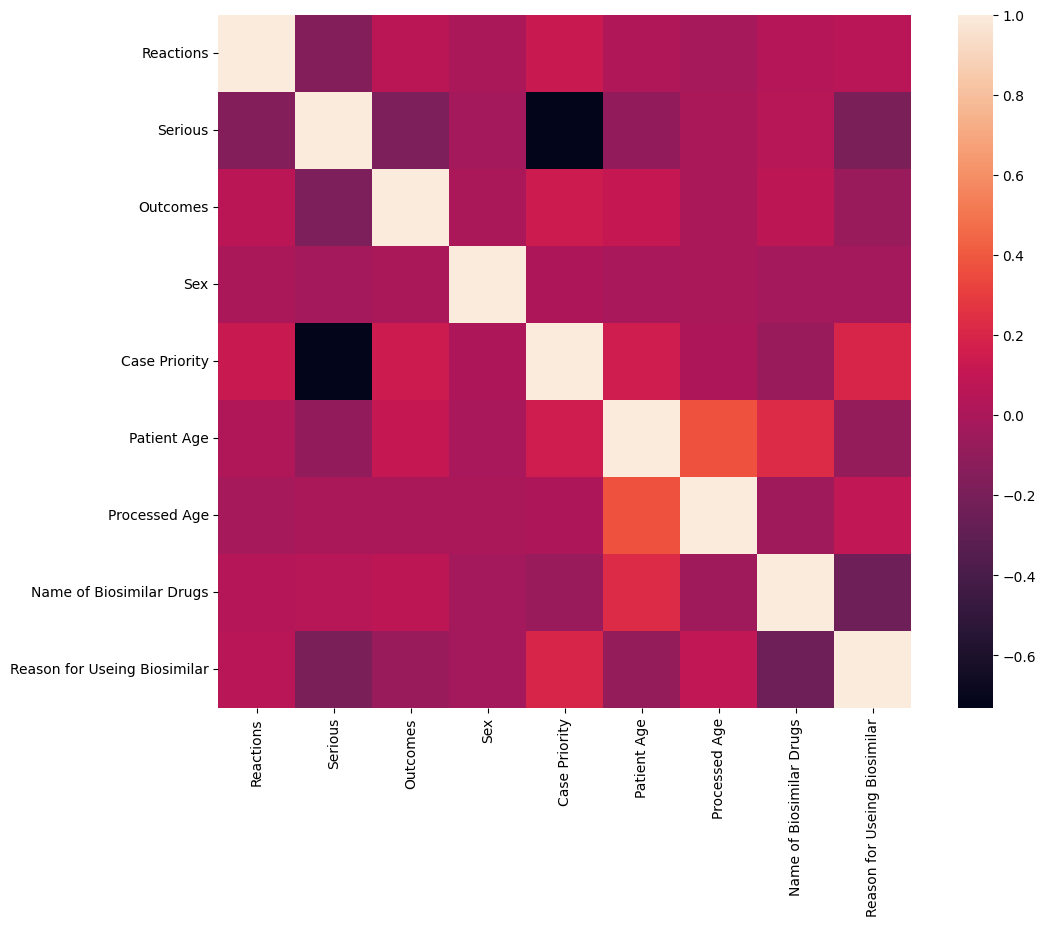

In [ ]:
corrmat =Biosimilar.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1,square=True);
plt.show()



In [ ]:
Biosimilar.columns

Index(['Reactions', 'Serious', 'Outcomes', 'Sex', 'Case Priority',
       'Patient Age', 'Processed Age', 'Name of Biosimilar Drugs',
       'Reason for Useing Biosimilar'],
      dtype='object')

In [ ]:


X = Biosimilar[['Sex', 'Case Priority',
       'Patient Age', 'Processed Age', 'Name of Biosimilar Drugs',
       'Reason for Useing Biosimilar']]  # Features
y = Biosimilar['Serious']  # Target variable (serious or non-serious)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))



Logistic Regression Accuracy: 0.9634769905040176


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9668371073776479


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9671292914536158


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [ ]:
log_reg_param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'penalty': ['l2'],  # Regularization type (l2 is common)
    'solver': ['liblinear', 'saga']  # Solvers to use
}

In [ ]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples at leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}


In [ ]:
xgb_param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 6, 10],  # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples to use for training each tree
    'colsample_bytree': [0.8, 0.9, 1.0]  # Fraction of features to use for each tree
}


In [ ]:
log_reg_grid_search = GridSearchCV(LogisticRegression(), log_reg_param_grid, cv=5, n_jobs=-1, verbose=1)
log_reg_grid_search.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", log_reg_grid_search.best_params_)
y_pred_log_reg = log_reg_grid_search.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.9634769905040176


In [ ]:
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train, y_train)
print("Best parameters for Random Forest:", rf_grid_search.best_params_)
y_pred_rf = rf_grid_search.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest Accuracy: 0.9665449233016801


In [ ]:
xgb_grid_search = GridSearchCV(xgb.XGBClassifier(), xgb_param_grid, cv=5, n_jobs=-1, verbose=1)
xgb_grid_search.fit(X_train, y_train)
print("Best parameters for XGBoost:", xgb_grid_search.best_params_)
y_pred_xgb = xgb_grid_search.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for XGBoost: {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.9}
XGBoost Accuracy: 0.966691015339664


In [ ]:
from sklearn.metrics import classification_report

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      1118
           1       0.97      0.99      0.98      5727

    accuracy                           0.96      6845
   macro avg       0.96      0.91      0.93      6845
weighted avg       0.96      0.96      0.96      6845

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      1118
           1       0.97      0.99      0.98      5727

    accuracy                           0.97      6845
   macro avg       0.96      0.92      0.94      6845
weighted avg       0.97      0.97      0.97      6845

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1118
           1       0.97      0.99      0.98      5727

    accuracy                           0.97      6845
   macro avg     

In [ ]:
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"Mean Absolute Error (XGBoost): {mae_xgb}")

mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Mean Absolute Error (RandomForest): {mae_rf}")

mae_log = mean_absolute_error(y_test, y_pred_log_reg)
print(f"Mean Absolute Error (Logistic Regression): {mae_log}")

Mean Absolute Error (XGBoost): 0.033308984660336015
Mean Absolute Error (RandomForest): 0.03316289262235208
Mean Absolute Error (Logistic Regression): 0.036523009495982466


In [13]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, MultiLabelBinarizer

# Feature Scaling
scaler = MinMaxScaler()
numeric_features = Biosimilar[['Patient Age', 'Processed Age']]
scaled_numeric_features = scaler.fit_transform(numeric_features)

# Encode Categorical Features
categorical_features = ['Sex', 'Case Priority', 'Name of Biosimilar Drugs', 'Reason for Useing Biosimilar']
encoder = OneHotEncoder()
encoded_categorical_features = encoder.fit_transform(Biosimilar[categorical_features]).toarray()


# Combine All Features


In [14]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, MultiLabelBinarizer

# ... (your existing code) ...

# Before encoding, create a copy of the 'Outcomes' and 'Reactions' columns with their original string values
outcomes_str = Biosimilar['Outcomes'].astype(str)  # Convert to string if not already
reactions_str = Biosimilar['Reactions'].astype(str)  # Convert to string if not already

# ... (your existing code for feature scaling and categorical encoding) ...

# Encode Multi-Label Targets using the string copies
mlb_outcome = MultiLabelBinarizer()
mlb_reaction = MultiLabelBinarizer()
outcome_encoded = mlb_outcome.fit_transform(outcomes_str.str.split(';'))
reaction_encoded = mlb_reaction.fit_transform(reactions_str.str.split(';'))

X = np.hstack([scaled_numeric_features, encoded_categorical_features])
y_outcome = outcome_encoded
y_reaction = reaction_encoded

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_outcome, y_test_outcome = train_test_split(X, y_outcome, test_size=0.2, random_state=42)
_, _, y_train_reaction, y_test_reaction = train_test_split(X, y_reaction, test_size=0.2, random_state=42)


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define Input Layer
input_layer = Input(shape=(X_train.shape[1],))

# Hidden Layers
hidden_layer = Dense(128, activation='relu')(input_layer)
hidden_layer = Dense(64, activation='relu')(hidden_layer)

# Output Layers
output_outcome = Dense(y_train_outcome.shape[1], activation='sigmoid', name='outcome_output')(hidden_layer)
output_reaction = Dense(y_train_reaction.shape[1], activation='sigmoid', name='reaction_output')(hidden_layer)

# Define Model
model = Model(inputs=input_layer, outputs=[output_outcome, output_reaction])

# Compile the Model
model.compile(
    optimizer='adam',
    loss={
        'outcome_output': 'binary_crossentropy',
        'reaction_output': 'binary_crossentropy',
    },
    metrics={
        'outcome_output': 'accuracy',
        'reaction_output': 'accuracy',
    }
)

# Summary of the Model
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 1646)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │        210,816 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          8,256 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ outcome_output (Dense)    │ (None, 619)            │         40,235 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reaction_output (Dense)   │ (None, 27818)          │      1,808,170 │ dense_1[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,067,477 (7.89 MB)

 Trainable params: 2,067,477 (7.89 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train,
    {'outcome_output': y_train_outcome, 'reaction_output': y_train_reaction},
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)


In [ ]:
results = model.evaluate(
    X_test,
    {'outcome_output': y_test_outcome, 'reaction_output': y_test_reaction}
)

print("Test Loss and Accuracy for Outcomes:", results[:2])
print("Test Loss and Accuracy for Reactions:", results[2:])


In [ ]:
# Predict probabilities
outcome_probs, reaction_probs = model.predict(X_test)

# Example: View predictions for the first test instance
print("Predicted Outcome Probabilities:", outcome_probs[0])
print("Predicted Reaction Probabilities:", reaction_probs[0])

# Convert probabilities to labels if needed
threshold = 0.5
predicted_outcomes = (outcome_probs > threshold).astype(int)
predicted_reactions = (reaction_probs > threshold).astype(int)

print("Predicted Outcome Labels:", predicted_outcomes[0])
print("Predicted Reaction Labels:", predicted_reactions[0])


In [15]:
########################
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [16]:
# Split the data for outcomes
X_train, X_test, y_train_outcome, y_test_outcome = train_test_split(X, y_outcome, test_size=0.2, random_state=42)

# Split the data for reactions
_, _, y_train_reaction, y_test_reaction = train_test_split(X, y_reaction, test_size=0.2, random_state=42)


In [19]:
# Initialize the Naive Bayes classifier
nb_outcome = MultinomialNB()

# Wrap it in a MultiOutputClassifier for multi-output support
multi_output_clf_outcome = MultiOutputClassifier(nb_outcome)

# Fit the model for outcomes
multi_output_clf_outcome.fit(X_train, y_train_outcome)


MultiOutputClassifier(estimator=MultinomialNB())

In [ ]:
# Initialize the Naive Bayes classifier for reactions
nb_reaction = MultinomialNB()

# Wrap it in a MultiOutputClassifier for multi-output support
multi_output_clf_reaction = MultiOutputClassifier(nb_reaction)

# Fit the model for reactions
multi_output_clf_reaction.fit(X_train, y_train_reaction)


In [ ]:
# Predict outcomes
y_pred_outcome = multi_output_clf_outcome.predict(X_test)

# Evaluate outcomes
print("Classification Report for Outcomes:")
print(classification_report(y_test_outcome, y_pred_outcome))


In [ ]:
# Predict reactions
y_pred_reaction = multi_output_clf_reaction.predict(X_test)

# Evaluate reactions
print("Classification Report for Reactions:")
print(classification_report(y_test_reaction, y_pred_reaction))


In [ ]:
# Predict probabilities for outcomes
outcome_probs = multi_output_clf_outcome.predict_proba(X_test)

# Example: Access probabilities for the first test instance
print("Predicted Outcome Probabilities for First Test Instance:")
for i, prob in enumerate(outcome_probs):
    print(f"Class {i + 1}: {prob[0]}")


In [ ]:
# Predict probabilities for reactions
reaction_probs = multi_output_clf_reaction.predict_proba(X_test)

# Example: Access probabilities for the first test instance
print("Predicted Reaction Probabilities for First Test Instance:")
for i, prob in enumerate(reaction_probs):
    print(f"Class {i + 1}: {prob[0]}")
